In [1]:
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input
import sklearn.metrics as metrics

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

# picture1

In [209]:
path='C:\\Users\\user\\Desktop\\project\\picture'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)  


x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Images are all in read_images
(40000, 100, 100)
Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


### vgg16--60--p1

In [211]:
#vgg16-60

def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('VGG16(Picture 01)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture\confusion_matrix_vgg16_picture01.jpg', bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

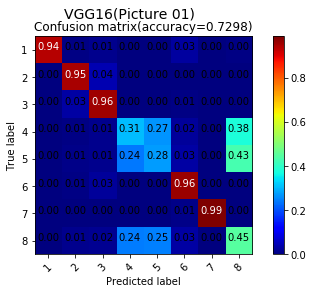

In [212]:
# vgg-60

#model01=load_model(r'C:\Users\user\Desktop\project\final_model\vgg_picture\model_iter60_6.hdf5') 
#a=model01.evaluate(x_test,y_test)
plot_confuse(model01, x_test, y_test,round(a[1],4))

In [ ]:
### kappa

In [245]:
y_test_ori=y_test_ori.flatten()
y_test_ori

array([8, 7, 3, ..., 5, 7, 7])

In [246]:
#prediction = np.argmax(model01.predict(x_test),axis= 1)
prediction

array([3, 6, 2, ..., 7, 6, 6], dtype=int64)

In [248]:
metrics.cohen_kappa_score(y_test_ori, prediction) 

-0.07455988775226396

### incv3--60-p1

In [249]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('Inception v3(Picture 01)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture\confusion_matrix_inceptionv3_picture01.jpg', bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

8000/8000 [==============================] - 16s 2ms/sample - loss: 1.3100 - acc: 0.7411


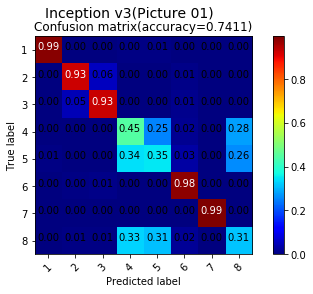

In [250]:
model02=load_model(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture\model_iter60_4.hdf5') 
a=model02.evaluate(x_test,y_test)
plot_confuse(model02, x_test, y_test,round(a[1],4))

In [ ]:
# KAPPA

In [252]:
y_test_ori=y_test_ori.flatten()
y_test_ori
prediction = np.argmax(model02.predict(x_test),axis= 1)
prediction
metrics.cohen_kappa_score(y_test_ori, prediction) 

array([7, 6, 2, ..., 7, 6, 6], dtype=int64)

-0.07386764798791123

# picture02 進入 model_vgg16_picture01、model_inceptionv3_picture01測試

In [255]:
path='C:\\Users\\user\\Desktop\\project\\picture_2'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)  


x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))



Images are all in read_images
(40000, 100, 100)
Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


# 各細類 ------------------------------------------------------------------------------

In [98]:
def file_extension(path):
    return os.path.split(path)[1]

label=[]

for i in range(0,len(image_name)):
    path=image_name[i]
    str(path)
    if file_extension(path).split('_')[0]=='8':
        la=['8','0']
        label.append(la)
    else:    
        first=file_extension(path).split('_')[0]
        two=file_extension(path).split('_')[1]
        la=[file_extension(path).split('_')[0],file_extension(path).split('_')[1]]
        label.append(la)
    
x = read_images
#split = np.random.choice(40000,8000,replace=False)
y=label
#y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
#print('Shape of y_train is (%d,%d)'%(y_train.shape))
#print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
#y_test = onehot.fit_transform(y_test).toarray()
#print('Shape of y_train is (%d,%d)'%(y_train.shape))      

### test02 --model_vgg16_picture01

In [91]:
model01=load_model(r'C:\Users\user\Desktop\project\final_model\vgg_picture\model_iter60_6.hdf5') 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [157]:
value=model01.predict(x_test)
predict=np.argmax(value,axis=1)+1
predict[1:20]

a=pd.DataFrame(predict)
a=a.rename(columns={0:'true'})
b=pd.DataFrame(y_test_ori)
b=b.rename(columns={0:'first', 1:'two'})
c= pd.merge(b, a, how='left',on=b.index)
c[1:50]

c['acc']=0
for i in range(0,len(predict)):
     c['acc'].iloc[i]=np.where(c['first'][i]==str(c['true'][i]),1,0)




c_sort=c.sort_values(by=['first','two'])
c_sort

,key_0,first,two,true,acc
79,79,1,1,1,1
178,178,1,1,1,1
180,180,1,1,1,1
192,192,1,1,1,1
207,207,1,1,1,1
...,...,...,...,...,...
7932,7932,8,0,5,0
7945,7945,8,0,8,1
7951,7951,8,0,8,1
7970,7970,8,0,5,0


In [175]:
# 馬賽克
fliter = (c_sort["first"] == "1")
group1=c_sort[fliter]
print(group1.groupby('two')['acc'].sum()/group1.groupby('two').size())


two
1    0.921466
2    0.009302
3    0.897561
4    0.000000
5    0.057803
dtype: float64


In [174]:
# 內縮
fliter = (c_sort["first"] == "2")
group2=c_sort[fliter]
print(group2.groupby('two')['acc'].sum()/group2.groupby('two').size())

two
1    204
2    197
3    215
4    226
5    192
dtype: int64
two
1    0.475490
2    0.979695
3    0.953488
4    0.876106
5    0.796875
dtype: float64


In [176]:
# 外擴

fliter = (c_sort["first"] == "3")
group3=c_sort[fliter]
print(group3.groupby('two')['acc'].sum()/group3.groupby('two').size())

two
1    0.343590
2    1.000000
3    0.838889
4    0.587065
5    0.455959
dtype: float64


In [179]:
# 亮度

fliter = (c_sort["first"] == "4")
group4=c_sort[fliter]
print(group4.groupby('two')['acc'].sum()/group4.groupby('two').size())

two
1    0.030769
2    0.090164
3    0.029412
4    0.017544
5    0.070312
6    0.033058
7    0.040984
8    0.053030
dtype: float64


In [180]:
# 對比

fliter = (c_sort["first"] == "5")
group5=c_sort[fliter]
print(group5.groupby('two')['acc'].sum()/group5.groupby('two').size())

two
1    0.073171
2    0.093220
3    0.131783
4    0.085470
5    0.146341
6    0.068966
7    0.061069
8    0.100000
dtype: float64


In [181]:
# 銳化

fliter = (c_sort["first"] == "6")
group6=c_sort[fliter]
print(group6.groupby('two')['acc'].sum()/group6.groupby('two').size())

two
1    0.486641
2    0.464213
dtype: float64


In [182]:
# 黏貼

fliter = (c_sort["first"] == "7")
group7=c_sort[fliter]
print(group7.groupby('two')['acc'].sum()/group7.groupby('two').size())

two
1    0.029963
2    0.000000
3    0.008403
4    0.765690
dtype: float64


In [256]:
model01=load_model(r'C:\Users\user\Desktop\project\final_model\vgg_picture\model_iter60_6.hdf5') 

In [259]:
def plot_confusion_matrix(cm, classes,acc,title='Confusion matrix',cmap=plt.cm.jet):
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('model_vgg16_picture01 vs test02',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\confusion_matrix_test02_model_vgg16_picture01.jpg',bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

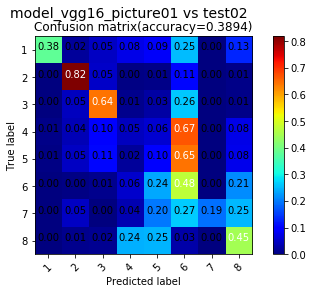

In [260]:
#a=model01.evaluate(x_test,y_test)
plot_confuse(model01, x_test, y_test,round(a[1],4))

### test02 --model_inception v3_picture01

In [261]:
model02=load_model(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture\model_iter60_4.hdf5')

In [22]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('model_incv3_picture01 vs test02',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\confusion_matrix_test02_model_incv3_picture01.jpg',bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

8000/8000 [==============================] - 15s 2ms/sample - loss: 4.6691 - acc: 0.4137


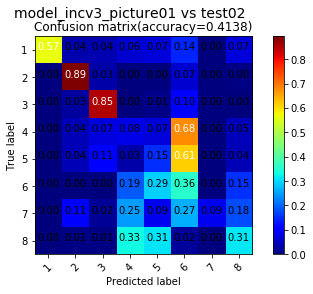

In [263]:
a=model02.evaluate(x_test,y_test)
plot_confuse(model02, x_test, y_test,round(a[1],4))

In [33]:
path='C:\\Users\\user\\Desktop\\project\\picture_2'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)  

############################################################################################################

def file_extension(path):
    return os.path.split(path)[1]

label=[]

for i in range(0,len(image_name)):
    path=image_name[i]
    str(path)
    if file_extension(path).split('_')[0]=='8':
        la=['8','0']
        label.append(la)
    else:    
        first=file_extension(path).split('_')[0]
        two=file_extension(path).split('_')[1]
        la=[file_extension(path).split('_')[0],file_extension(path).split('_')[1]]
        label.append(la)
    
x = read_images
#split = np.random.choice(40000,8000,replace=False)
y=label
#y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
#print('Shape of y_train is (%d,%d)'%(y_train.shape))
#print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
#y_test = onehot.fit_transform(y_test).toarray()
#print('Shape of y_train is (%d,%d)'%(y_train.shape))    

Images are all in read_images
(40000, 100, 100)
Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)


In [13]:
model02=load_model(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture\model_iter60_4.hdf5')

In [34]:
value=model02.predict(x_test)
predict=np.argmax(value,axis=1)+1
predict[1:20]

a=pd.DataFrame(predict)
a=a.rename(columns={0:'true'})
b=pd.DataFrame(y_test_ori)
b=b.rename(columns={0:'first', 1:'two'})
c= pd.merge(b, a, how='left',on=b.index)
c[1:50]

c['acc']=0
for i in range(0,len(predict)):
     c['acc'].iloc[i]=np.where(c['first'][i]==str(c['true'][i]),1,0)




c_sort=c.sort_values(by=['first','two'])
c_sort

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,key_0,first,two,true,acc
79,79,1,1,1,1
178,178,1,1,1,1
180,180,1,1,1,1
192,192,1,1,1,1
207,207,1,1,1,1
...,...,...,...,...,...
7932,7932,8,0,4,0
7945,7945,8,0,4,0
7951,7951,8,0,5,0
7970,7970,8,0,8,1


In [35]:
# 馬賽克
fliter = (c_sort["first"] == "1")
group1=c_sort[fliter]
print(group1.groupby('two')['acc'].sum()/group1.groupby('two').size())

two
1    0.984293
2    0.004651
3    0.956098
4    0.005208
5    0.976879
dtype: float64


In [36]:
#內縮
fliter = (c_sort["first"] == "2")
group2=c_sort[fliter]
print(group2.groupby('two')['acc'].sum()/group2.groupby('two').size())

two
1    0.750000
2    0.928934
3    0.930233
4    0.942478
5    0.911458
dtype: float64


In [37]:
# 外
fliter = (c_sort["first"] == "3")
group3=c_sort[fliter]
print(group3.groupby('two')['acc'].sum()/group3.groupby('two').size())

two
1    0.656410
2    0.970149
3    0.905556
4    0.890547
5    0.839378
dtype: float64


In [38]:
# 亮度
fliter = (c_sort["first"] == "4")
group4=c_sort[fliter]
print(group4.groupby('two')['acc'].sum()/group4.groupby('two').size())

two
1    0.107692
2    0.122951
3    0.110294
4    0.096491
5    0.070312
6    0.024793
7    0.057377
8    0.075758
dtype: float64


In [39]:
# 對比
fliter = (c_sort["first"] == "5")
group5=c_sort[fliter]
print(group5.groupby('two')['acc'].sum()/group5.groupby('two').size())

two
1    0.130081
2    0.220339
3    0.147287
4    0.128205
5    0.146341
6    0.137931
7    0.152672
8    0.153846
dtype: float64


In [40]:
# 銳
fliter = (c_sort["first"] == "6")
group6=c_sort[fliter]
print(group6.groupby('two')['acc'].sum()/group6.groupby('two').size())

two
1    0.377863
2    0.333333
dtype: float64


In [41]:
# 黏貼
fliter = (c_sort["first"] == "7")
group7=c_sort[fliter]
print(group7.groupby('two')['acc'].sum()/group7.groupby('two').size())

two
1    0.041199
2    0.047059
3    0.000000
4    0.276151
dtype: float64


#  test02 進入 model_vgg16_picture02

In [264]:
path='C:\\Users\\user\\Desktop\\project\\picture_2'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)  


x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Images are all in read_images
(40000, 100, 100)
Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


In [265]:
model03=load_model(r'C:\Users\user\Desktop\project\final_model\vgg_picture2\model_iter60_9.hdf5')

In [266]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('VGG16(Picture 02)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture2\confusion_matrix_vgg16_picture02.jpg',bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

8000/8000 [==============================] - 43s 5ms/sample - loss: 0.8941 - acc: 0.8355


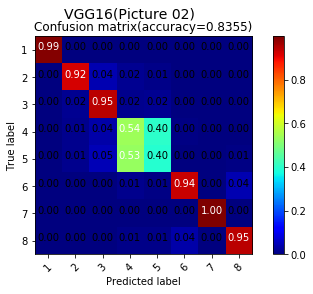

In [267]:
a=model03.evaluate(x_test,y_test)
plot_confuse(model03, x_test, y_test,round(a[1],4))

In [ ]:
# kappa

In [268]:
y_test_ori=y_test_ori.flatten()
y_test_ori
prediction = np.argmax(model03.predict(x_test),axis= 1)
prediction
metrics.cohen_kappa_score(y_test_ori, prediction) 

-0.05694321949782344

# test02 進入 model_incv3_picture02

In [269]:
model04=load_model(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture2\model_iter100_10.hdf5')

In [270]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('Inception v3(Picture 02)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture2\confusion_matrix_incv3_picture02.jpg',bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

8000/8000 [==============================] - 17s 2ms/sample - loss: 1.0013 - acc: 0.7996


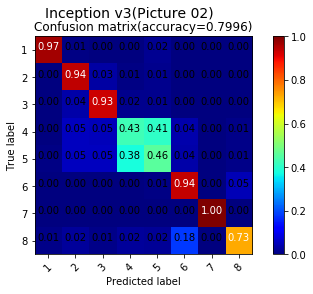

In [271]:
a=model04.evaluate(x_test,y_test)
plot_confuse(model04, x_test, y_test,round(a[1],4))

In [ ]:
# kappa

In [272]:
y_test_ori=y_test_ori.flatten()
y_test_ori
prediction = np.argmax(model04.predict(x_test),axis= 1)
prediction
metrics.cohen_kappa_score(y_test_ori, prediction) 

-0.05243175036784997

# mix_train

### vgg

In [3]:
path='C:\\Users\\user\\Desktop\\project\\picture_mix_train'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 
########################################################################
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,7),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Images are all in read_images
(30000, 100, 100)
Shape of x_train is (24000,100,100,1)
Shape of x_test is (6000,100,100,1)
Shape of y_train is (24000,1)
Shape of y_test is (6000,1)
Shape of y_train is (24000,6)


In [4]:
model05=load_model(r'C:\Users\user\Desktop\project\final_model\vgg_picture_mix\model_iter60_10.hdf5') 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [28]:
from sklearn.metrics import confusion_matrix
import itertools

In [5]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('VGG 16(Picture 03)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture_mix\confusion_matrix_vgg_picture03.jpg',bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)

6000/6000 [==============================] - 38s 6ms/sample - loss: 0.1818 - acc: 0.9515


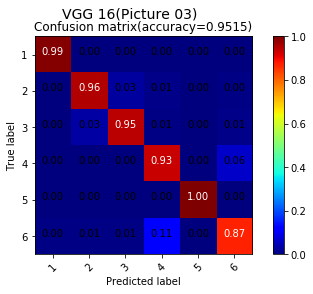

In [6]:
a=model05.evaluate(x_test,y_test)
plot_confuse(model05, x_test, y_test,round(a[1],4))

In [ ]:
# kappa

In [7]:
y_test_ori=y_test_ori.flatten()
y_test_ori
prediction = np.argmax(model05.predict(x_test),axis= 1)
prediction
metrics.cohen_kappa_score(y_test_ori, prediction) 

-0.15590145770401254

In [ ]:
# inception v3

In [8]:
model06=load_model(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture_mix\model_iter60_8.hdf5') 

In [9]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('Inception v3(Picture 03)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture_mix\confusion_matrix_incv3_picture03.jpg',bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)

6000/6000 [==============================] - 15s 2ms/sample - loss: 0.2486 - acc: 0.9377


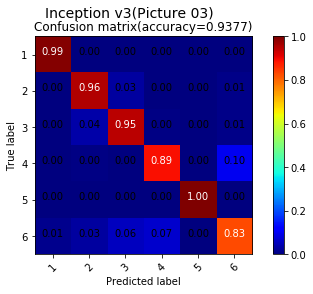

In [10]:
a=model06.evaluate(x_test,y_test)
plot_confuse(model06, x_test, y_test,round(a[1],4))

In [11]:
y_test_ori=y_test_ori.flatten()
y_test_ori
prediction = np.argmax(model06.predict(x_test),axis= 1)
prediction
metrics.cohen_kappa_score(y_test_ori, prediction) 

-0.15588541879523699

In [7]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
   
    plt.title('(incv3_60_1)'+title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_picture1_incv3_gray_60.jpg') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

8000/8000 [==============================] - 6s 714us/sample - loss: 1.4933 - acc: 0.7111


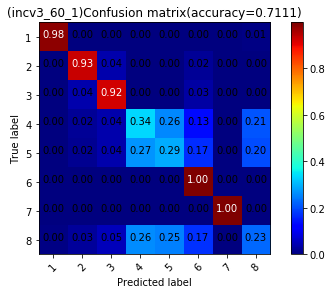

In [8]:
# inceptionv3-60
model02=load_model(r'C:\Users\user\Desktop\project\inceptionv3_picture\checkpoint60_record\model_iter60_1.hdf5') 
a=model02.evaluate(x_test,y_test)
plot_confuse(model02, x_test, y_test,round(a[1],4))

# picture2

In [9]:
path='C:\\Users\\user\\Desktop\\project\\picture_2'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
print(read_images.shape)  


x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,9),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Images are all in read_images
(40000, 100, 100)
Shape of x_train is (32000,100,100,1)
Shape of x_test is (8000,100,100,1)
Shape of y_train is (32000,1)
Shape of y_test is (8000,1)
Shape of y_train is (32000,8)


In [10]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
   
    plt.title('(vgg60_2)'+title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_picture2_vgg_gray_60.jpg') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

8000/8000 [==============================] - 10s 1ms/sample - loss: 0.7265 - acc: 0.8361


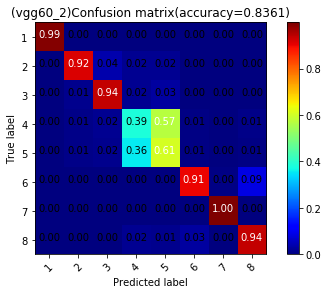

In [11]:
# vgg-60

model03=load_model(r'C:\Users\user\Desktop\project\VGG16_picture2\checkpoint60_record\model_iter60_10.hdf5') 
a=model03.evaluate(x_test,y_test)
plot_confuse(model03, x_test, y_test,round(a[1],4))

In [12]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
   
    plt.title('(incv3_100_2)'+title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(r'C:\Users\user\Desktop\project\compare\model_picture2_incv3_gray_100.jpg') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

8000/8000 [==============================] - 6s 731us/sample - loss: 1.0013 - acc: 0.7996


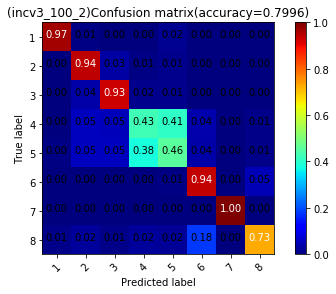

In [13]:
# inceptionv3-100

model04=load_model(r'C:\Users\user\Desktop\project\inceptionv3_picture2\model_iter100_10.hdf5') 

a=model04.evaluate(x_test,y_test)
plot_confuse(model04, x_test, y_test,round(a[1],4))